In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('insurance.csv')

In [10]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)
label.fit(data.smoker)
data.smoker = label.transform(data.smoker)
label.fit(data.region)
data.region = label.transform(data.region)

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
x = data.drop(['charges'], axis = 1)
y = data.charges

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)


In [106]:
y_pred_train = plr1.predict(x_train)
y_pred_test = plr1.predict(x_test)
train_rmse = mean_squared_error(y_train, y_pred_train)
test_rmse = mean_squared_error(y_test, y_pred_test)

In [107]:
print(train_rmse)



24080212.11123842


In [108]:
print(test_rmse)

18163476.891866025


In [21]:
y_pred = lr.predict(x)

In [31]:
import seaborn as sns

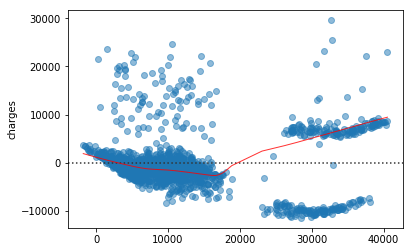

In [35]:
plt = sns.residplot(y_pred, y, data=data, lowess=True, scatter_kws={'alpha': 0.5}, line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

# Polynomial Basis Fucntion

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
def poly_reg(m):
    quad = PolynomialFeatures(degree = m)
    x_quad = quad.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

    plr1 = LinearRegression().fit(x_train, y_train)
    y_pred_train = plr1.predict(x_train)
    y_pred_test = plr1.predict(x_test)
    train_acc = mean_squared_error(y_train, y_pred_train)
    test_acc = mean_squared_error(y_test, y_pred_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_acc) + ", test rmse = " + str(test_acc))
    
    return train_acc, test_acc
    




In [112]:
x_coord = []
y_coord_train = []
y_coord_test = []
for i in range(1, 6):
    x_coord.append(i)
    a, b = poly_reg(i)
    y_coord_train.append(a)
    y_coord_test.append(b)

For m = 1 :  training rmse = 38050102.806068085, test rmse = 32073628.560109198
For m = 2 :  training rmse = 24080212.11123842, test rmse = 18163476.891866025
For m = 3 :  training rmse = 22617821.318695307, test rmse = 19040822.113693807
For m = 4 :  training rmse = 20508992.615823854, test rmse = 22372861.65216814
For m = 5 :  training rmse = 16537184.586574897, test rmse = 34343256.25002326


Text(0, 0.5, 'RMSE')

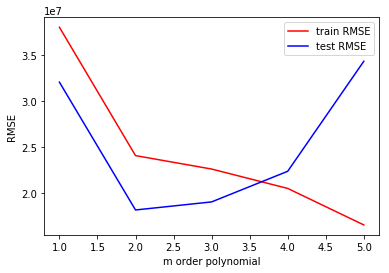

In [113]:
plt.plot(x_coord, y_coord_train, color='r', label = 'train RMSE')
plt.plot(x_coord, y_coord_test, color='b', label = 'test RMSE')
plt.legend(loc='best')
plt.xlabel('m order polynomial')
plt.ylabel('RMSE')


# Gaussian Basis Functions

In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
       
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);


TypeError: '(slice(None, None, None), None)' is an invalid key

In [109]:
def gauss_function(m):
    x_gauss = GaussianFeatures(m)
    x_train, x_test, y_train, y_test = train_test_split(x_gauss, y, random_state = 0)
    gauss_model = LinearRegression().fit(x_train, y_train)
    
    
    y_pred_train = gauss_model.predict(x_train)
    y_pred_test = gauss_model.predict(x_test)
    train_acc = mean_squared_error(y_train, y_pred_train)
    test_acc = mean_squared_error(y_test, y_pred_test)
    
    print("For m = " + str(m) + " :  training rmse = " + str(train_acc) + ", test rmse = " + str(test_acc))
    
    return train_acc, test_acc
   
    

In [110]:
x_coord = []
y_coord_train = []
y_coord_test = []
for i in range(1, 20):
    x_coord.append(i)
    a, b = poly_reg(i)
    y_coord_train.append(a)
    y_coord_test.append(b)

For m = 1 :  training rmse = 38050102.806068085, test rmse = 32073628.560109198
For m = 2 :  training rmse = 24080212.11123842, test rmse = 18163476.891866025
For m = 3 :  training rmse = 22617821.318695307, test rmse = 19040822.113693807
For m = 4 :  training rmse = 20508992.615823854, test rmse = 22372861.65216814
For m = 5 :  training rmse = 16537184.586574897, test rmse = 34343256.25002326
For m = 6 :  training rmse = 10908248.24033838, test rmse = 260839176349.2515
For m = 7 :  training rmse = 6430707.243371777, test rmse = 6097766215810.008
For m = 8 :  training rmse = 4922742.07395048, test rmse = 12677711372608.637
For m = 9 :  training rmse = 8746906.966065599, test rmse = 40267673810740.52
For m = 10 :  training rmse = 3985213.6955352225, test rmse = 32716932251399.766
For m = 11 :  training rmse = 6035504.517629125, test rmse = 38499733701044.97
For m = 12 :  training rmse = 4463614.949747385, test rmse = 60126326259104.92
For m = 13 :  training rmse = 7101390.23533351, test

KeyboardInterrupt: 